Analyze Nobel Prize winner data and identify patterns by answering the following questions:

1 What is the most commonly awarded gender and birth country?

Store your answers as string variables top_gender and top_country.

2 Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

Store this as an integer called max_decade_usa.

3 Which decade and Nobel Prize category combination had the highest proportion of female laureates?

Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.

4 Who was the first woman to receive a Nobel Prize, and in what category?

Save your string answers as first_woman_name and first_woman_category.

5 Which individuals or organizations have won more than one Nobel Prize throughout the years?

Store the full names in a list named repeat_list.

In [49]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/nobel.csv')
df.head(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [ ]:
# Qn 1
top_gender = df['sex'].value_counts().index[0]
top_country = df['birth_country'].value_counts().index[0]

c:\Users\ruoyu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ruoyu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ruoyu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ruoyu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

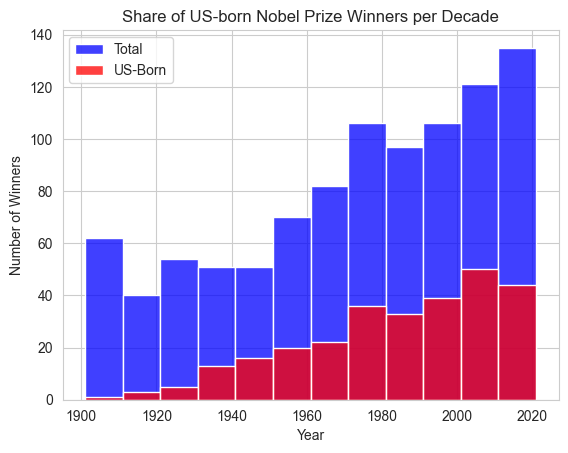

In [ ]:
# Qn 2 test plot
sns.set_style('whitegrid')

sns.histplot(data = df, x = 'year', bins = range(1901, 2030, 10), color = 'blue')
sns.histplot(data = df[df['birth_country'] == top_country], x = 'year', bins = range(1901, 2030, 10), color = 'red')

plt.title('Share of US-born Nobel Prize Winners per Decade')
plt.xlabel('Year')
plt.ylabel('Number of Winners')

plt.legend(labels = ['Total', 'US-Born'])


In [72]:
# Qn 2
df['decade'] = df['year'] // 10 * 10

df1 = df[df['birth_country'] == top_country].value_counts('decade') / df.value_counts('decade') 
max_decade_usa = df1.sort_values(ascending = False).index[0]

In [130]:
# Qn 3
df2 = df.groupby(['decade', 'category']).size()
df3 = df[df['sex'] == 'Female'].groupby(['decade', 'category']).size()
df4 = df3 / df2

max_female_dict = dict([df4.idxmax()])

In [140]:
# Qn 4
df5 = df[df['sex'] == 'Female'].sort_values('year')
first_woman_name = df5.iloc[0]['full_name']
first_woman_category = df5.iloc[0]['category']

In [147]:
# Qn 5
df6 = df['full_name'].value_counts()
repeat_list = list(df6[df6.values > 1].index)